In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import random
from math import sqrt

In [117]:
def sciPrintR(val, relErr, name=None):
    if name != None:
        print name, val, "+-", val * relErr, "(", relErr * 100., "%)"
    else:
        print val, "+-", val * relErr, "(", relErr * 100., "%)"
        
def sciPrintD(val, dErr, name=None):
    if name != None:
        print name, val, "+-", dErr, "(", (dErr/val) * 100., "%)"
    else:
        print val, "+-", dErr, "(", (dErr/val) * 100., "%)"
        
def prodErrorR(errors):
    errors = np.array(errors)
    return np.sqrt((errors**2).sum())

def stdPlt(X, Y, title=None):
    fig = plt.figure(figsize=(8, 16))
    if title != None:
        plt.title(title)

    ax = fig.add_subplot(111)
    k_off = 1.05
    x_minor_ticks = np.linspace(0, X.max() * k_off + 0.0001, 125) # 104 
    x_major_ticks = np.array([x_minor_ticks[i] for i in range(0, x_minor_ticks.size, 20)])
    y_minor_ticks = np.linspace(0, Y.max() * k_off + 0.0001, 248) # 4822
    y_major_ticks = np.array([y_minor_ticks[i] for i in range(0, y_minor_ticks.size, 20)])


    ax.set_xticks(x_major_ticks)
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.set_yticks(y_minor_ticks, minor=True)
    ax.grid(which='minor', alpha=0.4, linestyle='-')
    ax.grid(which='major', alpha=0.7, linestyle='-')


    plt.xlim((0, X.max() * k_off))
    plt.ylim((0, Y.max() * k_off))

    
    k = Y.max() / Y.mean()
    plt.plot([0, X.mean() * k], [0, Y.mean()* k])
    #plt.plot(X, Y)
    plt.scatter(X, Y, s=5, color="black")
    plt.show()

    
print(math.sqrt(0.1*0.1  + 0.6*0.6 + 0.4*0.4))
prodErrorR([0.1,0.6,0.4])


0.728010988928


0.72801098892805183

In [144]:
L = 501 * 1e-3
DL = 1 * 1e-3

am = (50.695 + 2.573 + 2.571 + 0.740) * 1e-3
m1 = 492.7 * 1e-3
m2 = 494.6 * 1e-3
m3 = 491.5 * 1e-3 # 491.5 * 1e-3
Dm = 0.5 * 1e-3

g = 9.815

print(am)

0.056579


freq :
135.925224934 +- 1.42579613834 ( 1.04895624711 %)
us :
134.6688 +- 1.45371516405 ( 1.07947435787 %)
134.602 +- 1.45369051588 ( 1.07999176527 %)
135.41028 +- 1.45398955175 ( 1.0737660034 %)
135.899828571 +- 1.45417150837 ( 1.07003189309 %)
136.895466667 +- 1.45454352448 ( 1.06252132368 %)
137.866090909 +- 1.45490871578 ( 1.05530570004 %)
138.037061538 +- 1.45497330014 ( 1.05404540195 %)
us_mean =  136.197075384 +- 0.539978086618 ( 0.396468195148 %)
pls :
pl[0] 0.00056494540974 +- 1.15592677133e-05 ( 2.0460857835 %)
pl[1] 0.000565506288742 +- 1.15592677133e-05 ( 2.04405643993 %)
pl[2] 0.000558775289906 +- 1.15592677133e-05 ( 2.06867911342 %)
pl[3] 0.000554756816139 +- 1.15592677133e-05 ( 2.08366393651 %)
pl[4] 0.000546716689393 +- 1.15592677133e-05 ( 2.11430672184 %)
pl[5] 0.000539045644718 +- 1.15592677133e-05 ( 2.14439497407 %)
pl[6] 0.000537711163999 +- 1.15592677133e-05 ( 2.14971689025 %)
pls mean after =
pl_mean_after 0.000552493900377 +- 4.36899252961e-06 ( 0.79077660887 %)


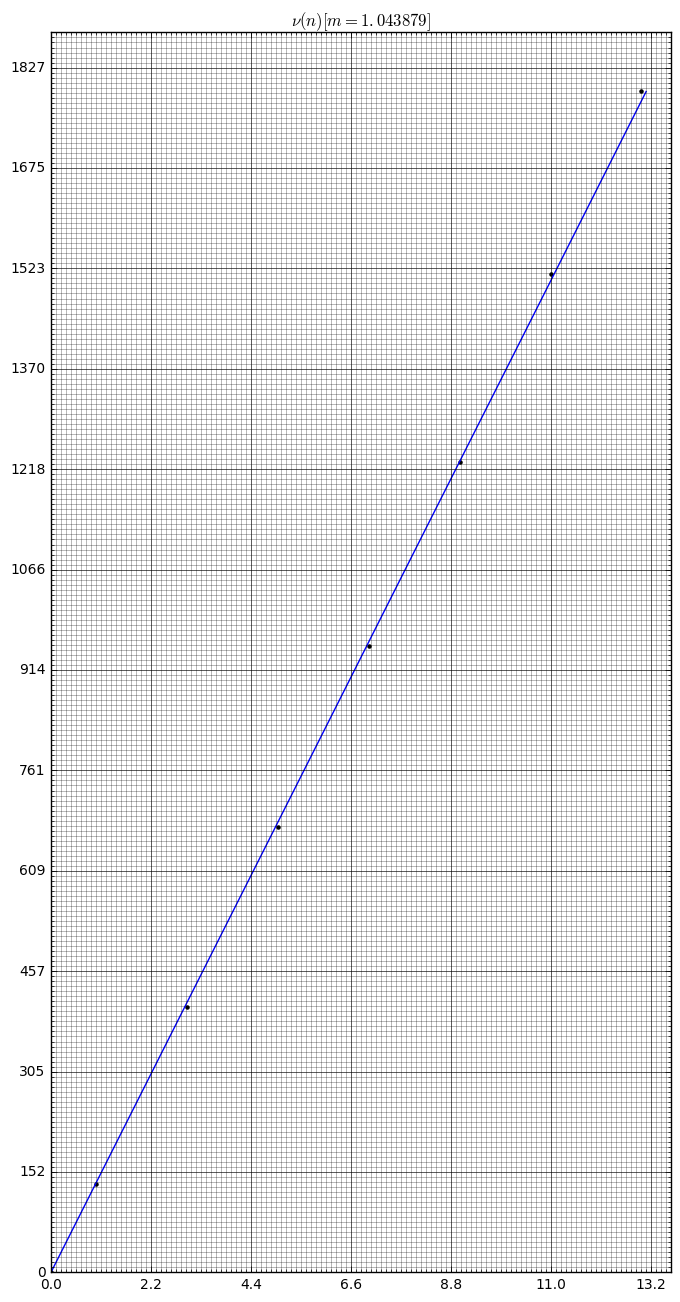

In [152]:
freqs = np.array([0, 134.4, 403.0, 675.7, 949.4, 1229.6, 1513.5, 1790.9]) # ! corrr
ns = np.array([0, 1, 3, 5, 7, 9, 11, 13])

def pl_works(freqs, ns, m_sum_1):
    print "freq :"
    sciPrintD((freqs[1:] / ns[1:]).mean(), (freqs[1:] / ns[1:]).std(ddof=1) / np.size(freqs.size))
    # tables
    wave_lengths = (2. * L)  / ns[1:]
    us = freqs[1:] * wave_lengths # u = lambda * freq
    print "us :"
    otd_freq_err = (freqs[1:] / ns[1:]).std(ddof=1)
    for i in range(us.size):
        sciPrintR(us[i], prodErrorR([otd_freq_err / (freqs[i + 1] / ns[i + 1]), DL / L]))
        
    us_mean = us.mean()
    Dus_mean = us.std(ddof=1)/np.sqrt(us.size)
    sciPrintD(us_mean, Dus_mean, "us_mean = ")

    T = g * m_sum_1 
    pl = T / (us * us )  # u = sqrt(T / pl)
    pls = pl
    print "pls :"
    for i in range(pl.size):
        sciPrintR(pl[i], pl.std(ddof=1) / pl[i], "pl[%d]" % (i))

    print "pls mean after ="
    sciPrintR(pl.mean(), prodErrorR([(pl.std(ddof=1) / math.sqrt(pl.size) / pl.mean()), 1 / 501]), "pl_mean_after")

    # mean
    freq_base = freqs[1:] / ns[1:]
    freq_mean = freq_base.mean()
    Dfreq_mean = freq_base.std(ddof=1) / np.sqrt(freq_base.size)
    Rfreq_mean = Dfreq_mean / freq_mean
    sciPrintR(freq_mean, Rfreq_mean, "lambda_1 = ")

    wave_length = 2. * L / ns[1]
    Rwave_length = DL / wave_length

    u = freq_mean * wave_length
    Ru = prodErrorR([Rwave_length, Rfreq_mean])

    Rm_sum_1 = (Dm * 2) / m_sum_1
    T = g * m_sum_1 
    RT = Rm_sum_1

    pl = T / (u * u)
    Rpl = prodErrorR([RT, Ru, Ru])

    sciPrintR(pl, Rpl, "pl_mean = ")
    return pls, us_mean, Dus_mean

great_pl_1, us_mean_1, Dus_mean1 = pl_works(freqs, ns, am + m1 + m2)
stdPlt(ns, freqs, title=r"$\nu(n) [m = %f]$" % (am + m1 + m2))

In [153]:
print("New start freq = ", freqs[1] * sqrt((m1 + m2 + m3)/(m1 + m2)))

('New start freq = ', 164.48618243331526)


freq :
161.986650017 +- 0.931313833509 ( 0.574932461048 %)
us :
161.4222 +- 0.987234089613 ( 0.611585079136 %)
161.8564 +- 0.987517280256 ( 0.610119389938 %)
161.66268 +- 0.987390849711 ( 0.610772288144 %)
161.823 +- 0.98749547224 ( 0.61023184111 %)
162.2739 +- 0.987790219477 ( 0.608717864966 %)
163.116490909 +- 0.988342970848 ( 0.605912354624 %)
164.019692308 +- 0.988938316623 ( 0.602938770771 %)
us_mean =  162.310623317 +- 0.352707549373 ( 0.217304044656 %)
pls :
pl[0] 0.0005783348673 +- 6.52812298848e-06 ( 1.12877907897 %)
pl[1] 0.000575236118306 +- 6.52812298848e-06 ( 1.13485971773 %)
pl[2] 0.000576615552407 +- 6.52812298848e-06 ( 1.13214479929 %)
pl[3] 0.000575473598381 +- 6.52812298848e-06 ( 1.13439139638 %)
pl[4] 0.000572279978903 +- 6.52812298848e-06 ( 1.14072188948 %)
pl[5] 0.000566382935758 +- 6.52812298848e-06 ( 1.15259881192 %)
pl[6] 0.000560162348902 +- 6.52812298848e-06 ( 1.16539838875 %)
pls mean after =
pl_mean_after 0.000572069342851 +- 2.46739856508e-06 ( 0.4313110981

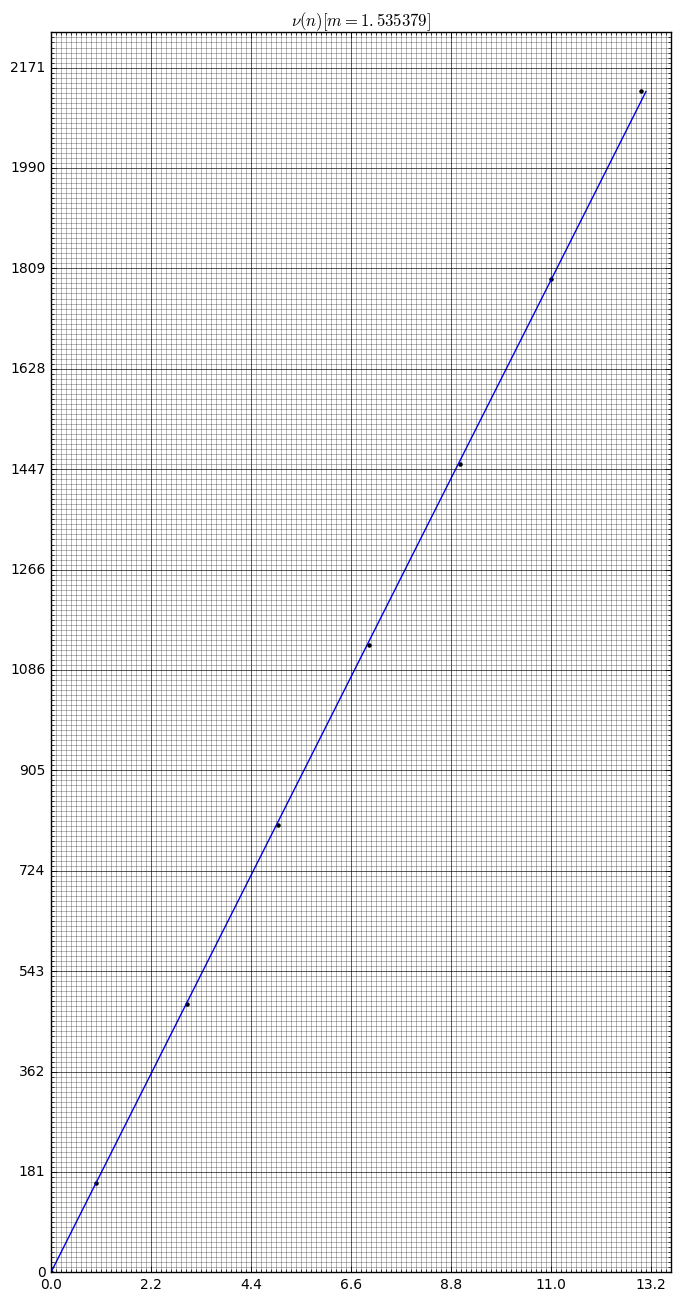

In [154]:
freq2 = np.array([0, 161.1, 484.6, 806.7, 1130.5, 1457.55, 1790.7, 2128.0])
ns2 = np.array([0, 1, 3, 5, 7, 9, 11, 13])

great_pl_2, us_mean_2, Dus_mean2 = pl_works(freq2, ns2, am + m1 + m2 + m3 )
stdPlt(ns2, freq2, title=r"$\nu(n) [m = %f]$" % (am + m1 + m2 + m3))

In [150]:
all_pl = np.append(great_pl_1, great_pl_2)
# print(all_pl)

PL_VAL = all_pl.mean()
R_PL_VAL = all_pl.std(ddof=1)/np.sqrt(all_pl.size) / PL_VAL

R_PL_VAL = prodErrorR([R_PL_VAL, Dm / (am + m1+ m2+m3), 1. / 501.])

sciPrintR(PL_VAL * 1e6, R_PL_VAL)

562.281621614 +- 3.80423450194 ( 0.676571019879 %)
